In [1]:
import psycopg2

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 8]

from pprint import pprint

try:
  con
except NameError:
  con = psycopg2.connect(user="postgres", dbname="newrealadb", password="coap")
  con.set_session(readonly=True, autocommit=False)
    

In [2]:
exp_data_sql = """
SELECT 
    ex.exp_id,
    ex.num_trials, 
    d.dnid,
    n.*
FROM 
	experiment ex
  JOIN deployed_node d ON d.exp_id = ex.exp_id
  JOIN node n ON d.node_id = n.node_id
  JOIN event e ON e.observer_id = d.dnid
GROUP BY
	ex.exp_id,
    n.node_id,
    d.dnid
ORDER BY
  ex.attacker_rate,
  ex.proxy_connections
;
"""
lay_of_the_land = pd.read_sql_query(exp_data_sql, con)
con.commit()
print("\n".join(lay_of_the_land.exp_id.unique().tolist()))
lay_of_the_land

1client_0attacker_infinite_requests_many_trials_realAstatic_norouterproxy
1client_1attacker_infinite_requests_many_trials_realAstatic_norouterproxy
1client_1attacker_infinite_requests_many_trials_realAstatic_norouterproxy_verify_MaxKeepAliveRequests_longrunningrecovery
2client_0attacker_infinite_requests_many_trials_realAstatic_norouterproxy
2client_1attacker_infinite_requests_many_trials_realAstatic_norouterproxy
3client_0attacker_infinite_requests_many_trials_realAstatic_norouterproxy
3client_1attacker_infinite_requests_many_trials_realAstatic_norouterproxy


,exp_id,num_trials,dnid,node_id,node_name,hardware_type,operating_system
0,1client_0attacker_infinite_requests_many_trial...,3,5,1,originserver,pc2133,ubuntu1804-std
1,1client_0attacker_infinite_requests_many_trial...,3,6,4,proxy,microcloud,ubuntu1804-std
2,1client_0attacker_infinite_requests_many_trial...,3,2,5,client1,pc3000,ubuntu1804-std
3,1client_1attacker_infinite_requests_many_trial...,3,26,1,originserver,pc2133,ubuntu1804-std
4,1client_1attacker_infinite_requests_many_trial...,3,28,2,receiver,pc3000,ubuntu1804-std
5,1client_1attacker_infinite_requests_many_trial...,3,22,3,attacker,pc3000,ubuntu1804-std
6,1client_1attacker_infinite_requests_many_trial...,3,27,4,proxy,microcloud,ubuntu1804-std
7,1client_1attacker_infinite_requests_many_trial...,3,23,5,client1,pc3000,ubuntu1804-std
8,1client_1attacker_infinite_requests_many_trial...,3,47,1,originserver,pc2133,ubuntu1804-std
9,1client_1attacker_infinite_requests_many_trial...,3,49,2,receiver,pc3000,ubuntu1804-std


In [3]:
exp_id = "1client_1attacker_infinite_requests_many_trials_realAstatic_norouterproxy_verify_MaxKeepAliveRequests_longrunningrecovery"

node_map_node_id = dict()
node_map_dnid = dict()

df = lay_of_the_land
records = df[(df["exp_id"] == exp_id)][["node_name", "dnid", "node_id"]].to_records(index=False)
client_node_ids = set()
client_dnids = set()
proxy_node_id = None
for node_name, dnid, node_id in records:
    node_map_node_id[node_name] = node_id
    node_map_dnid[node_name] = dnid
    if node_name.startswith("client"):
        client_node_ids.add(node_id)
        client_dnids.add(dnid)
    elif node_name == 'proxy':
        proxy_node_id = node_id
    
pprint(node_map_node_id)
pprint(node_map_dnid)
pprint(client_node_ids)
pprint(client_dnids)
pprint(proxy_node_id)

{'attacker': 3, 'client1': 5, 'originserver': 1, 'proxy': 4, 'receiver': 2}
{'attacker': 43, 'client1': 44, 'originserver': 47, 'proxy': 48, 'receiver': 49}
{5}
{44}
4


In [4]:
summary_sql = f"""
SELECT 
	n.node_name AS observer,
	e.trial,
	COUNT (DISTINCT e.message_marker) AS unique_messages,
	COUNT (e.message_marker) AS total_messages,
	MIN(e.observe_timestamp) min_timestamp_sec,
	MAX(e.observe_timestamp) max_timestamp_sec,
	MAX(e.observe_timestamp) - MIN(e.observe_timestamp) active_time_sec
FROM 
	deployed_node d 
	JOIN node n ON n.node_id = d.node_id
	JOIN "event" e ON e.observer_id = d.dnid
WHERE 
	d.exp_id = '{exp_id}'
GROUP BY
	n.node_name,
	e.trial
"""

sdf = pd.read_sql_query(summary_sql, con)
con.commit()
sdf

,observer,trial,unique_messages,total_messages,min_timestamp_sec,max_timestamp_sec,active_time_sec
0,attacker,1,163592,163592,1.638570e+09,1.638570e+09,19.737807
1,attacker,2,168433,168433,1.638570e+09,1.638570e+09,19.735312
2,attacker,3,165811,165811,1.638570e+09,1.638570e+09,19.744127
3,client1,1,4009,8025,1.638570e+09,1.638570e+09,298.613107
4,client1,2,3978,7963,1.638570e+09,1.638570e+09,297.618920
5,client1,3,4005,8017,1.638570e+09,1.638571e+09,298.630650
6,originserver,1,138067,276379,1.638570e+09,1.638570e+09,298.804937
7,originserver,2,137999,276223,1.638570e+09,1.638570e+09,298.814277
8,originserver,3,137896,276111,1.638570e+09,1.638571e+09,298.845772
9,proxy,1,167607,604831,1.638570e+09,1.638570e+09,298.988736


In [5]:
client_messages_sql = f"""
SELECT
    e.observe_timestamp,
    e.message_marker,
    e.trial,
	m.src_id,
	m.dst_id,
    m.size_bytes
FROM
	event e
	JOIN message m ON e.message_id = m.message_id
WHERE
	e.observer_id IN ({','.join(map(str, client_dnids))})
ORDER BY
    e.observe_timestamp
;
"""

df = pd.read_sql_query(client_messages_sql, con)
con.commit()

# Negate timestamp of client src message to measure RTT
df["observe_timestamp"] = df.where(df["dst_id"].isin(client_node_ids), df["observe_timestamp"] * -1, axis=0)

rtts_df = df.groupby(by=["trial", "message_marker"]).agg(\
                                              rtt_sec=("observe_timestamp", "sum"), 
                                              timestamp=("observe_timestamp", "max"),
                                              src_id=("src_id", "max"),
                                              max_size_bytes=("size_bytes", "max")).reset_index()
rtts_df = rtts_df[rtts_df["rtt_sec"] > 0]
rtts_df["rtt_ms"] = rtts_df["rtt_sec"] * 1e3

rps_records = []

for t in rtts_df["trial"].unique():
    print(f"Trial {t}")
    trial_df = rtts_df[rtts_df["trial"] == t]
    for client_number, src_id in enumerate(trial_df["src_id"].unique(), start=1):
        print(f"-- Client {client_number}")
        client_trial_df = trial_df[trial_df["src_id"] == src_id]
        client_trial_df["count"] = np.arange(1, len(client_trial_df) + 1)
        print(client_trial_df.describe())
        average_rps = client_trial_df["count"].max() / (client_trial_df["timestamp"].max() - client_trial_df["timestamp"].min())
        print(f"\naverage_rps={average_rps}")
        print()
        
        rps_records.append({
            "trial": t, 
            "src_id": src_id,
            "client_number": client_number,
            "average_rps": average_rps,
        })

# Add average rps per client per trial to the rtts df
rps_df = pd.DataFrame.from_records(rps_records)
rtts_df = rtts_df.merge(rps_df[["trial", "src_id", "average_rps"]], on=["trial", "src_id"], how="left")
        
rtts_df

Trial 1
-- Client 1
        trial  message_marker      rtt_sec     timestamp  src_id  \
count  4005.0     4005.000000  4005.000000  4.005000e+03  4005.0   
mean      1.0   150607.744819     0.054147  1.638570e+09     5.0   
std       0.0    47790.464193     0.020646  7.707420e+01     0.0   
min       1.0        1.000000     0.053208  1.638570e+09     5.0   
25%       1.0   164597.000000     0.053542  1.638570e+09     5.0   
50%       1.0   165598.000000     0.053636  1.638570e+09     5.0   
75%       1.0   166599.000000     0.053722  1.638570e+09     5.0   
max       1.0   167600.000000     1.325165  1.638570e+09     5.0   

       max_size_bytes       rtt_ms        count  
count     4005.000000  4005.000000  4005.000000  
mean       108.724345    54.146936  2003.000000  
std          0.508095    20.645620  1156.288243  
min        106.000000    53.207874     1.000000  
25%        109.000000    53.541899  1002.000000  
50%        109.000000    53.636074  2003.000000  
75%        109.00

,trial,message_marker,rtt_sec,timestamp,src_id,max_size_bytes,rtt_ms,average_rps
0,1,1,0.203863,1.638570e+09,5,106,203.863144,13.421191
1,1,2,0.057276,1.638570e+09,5,106,57.276011,13.421191
2,1,3,0.056300,1.638570e+09,5,106,56.299925,13.421191
3,1,4,0.056384,1.638570e+09,5,106,56.384087,13.421191
4,1,5,0.056397,1.638570e+09,5,106,56.396961,13.421191
...,...,...,...,...,...,...,...,...
11974,3,169811,0.053409,1.638571e+09,5,109,53.409100,13.406388
11975,3,169812,0.053678,1.638571e+09,5,109,53.677797,13.406388
11976,3,169813,0.053414,1.638571e+09,5,109,53.413868,13.406388
11977,3,169814,0.053697,1.638571e+09,5,109,53.697109,13.406388


In [6]:
rtts_df["rtt_ms"].describe()

count    11979.000000
mean        54.110686
std         18.187602
min         53.119183
25%         53.544283
50%         53.643942
75%         53.734064
max       1360.386848
Name: rtt_ms, dtype: float64

/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


<IPython.core.display.Javascript object>


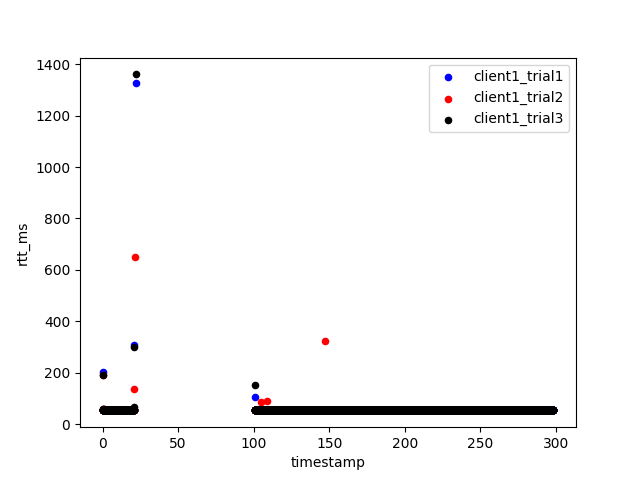

/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [7]:
%matplotlib notebook

ignore_clients = {}
ignore_trials = {}

ax = None
color_map = {(1,0): "orange", (1,1): "blue", (1,2): "red", (1,3): "black",
             (2,0): "skyblue", (2,1): "brown", (2,2): "gold", (2,3): "maroon",
             (3,0): "silver", (3,1): "green", (3,2): "purple", (3,3): "pink"}
for t in rtts_df["trial"].unique():
    if t in ignore_trials:
        continue
    trial_df = rtts_df[rtts_df["trial"] == t]
    min_timestamp = trial_df["timestamp"].min()
    trial_df["timestamp"] -= min_timestamp
    for client_number, src_id in enumerate(trial_df["src_id"].unique(), start=1):
        if client_number in ignore_clients:
            continue
        client_trial_df = trial_df[trial_df["src_id"] == src_id]
        label = f"client{client_number}_trial{t}"
        if ax:
            client_trial_df.plot(kind="scatter", x="timestamp", y="rtt_ms", label=label, ax=ax, color=color_map[(client_number, t)])
        else:
            ax = client_trial_df.plot(kind="scatter", x="timestamp", y="rtt_ms", label=label, color=color_map[(client_number, t)])
plt.show()

/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

<IPython.core.display.Javascript object>


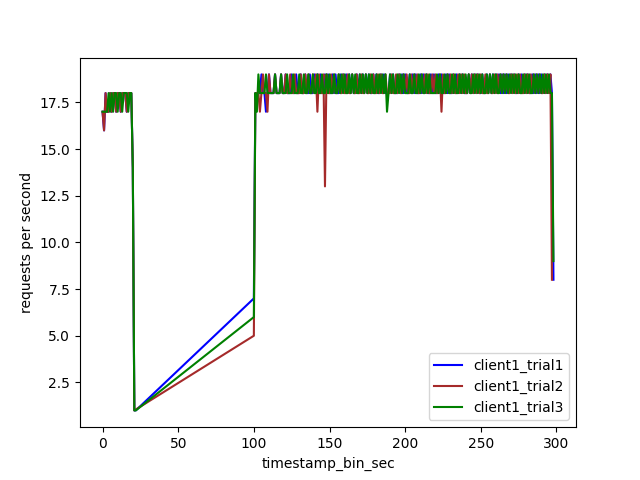

/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

,timestamp_bin_sec,src_id,packets_per_second,bytes_per_second
0,0.0,5,17,1810
1,1.0,5,17,1819
2,2.0,5,17,1819
3,3.0,5,17,1819
4,4.0,5,18,1926
...,...,...,...,...
217,294.0,5,18,1962
218,295.0,5,19,2071
219,296.0,5,18,1962
220,297.0,5,18,1962


In [8]:
trial_df["timestamp_bin_sec"] = np.floor(trial_df["timestamp"])

ignore_clients = {}
ignore_trials = {4, 5}

ax = None
for t in rtts_df["trial"].unique():
    if t in ignore_trials:
        continue
    trial_df = rtts_df[rtts_df["trial"] == t]
    min_timestamp = trial_df["timestamp"].min()
    trial_df["timestamp"] -= min_timestamp
    trial_df["timestamp_bin_sec"] = np.floor(trial_df["timestamp"])
    time_stats_df = trial_df.groupby(by=["timestamp_bin_sec", "src_id"]).agg(\
                                             packets_per_second=("max_size_bytes", "count"),
                                             bytes_per_second=("max_size_bytes", "sum")).reset_index()
    
    for client_number, src_id in enumerate(trial_df["src_id"].unique(), start=1):
        if client_number in ignore_clients:
            continue
        client_trial_df = time_stats_df[time_stats_df["src_id"] == src_id]
        label = f"client{client_number}_trial{t}"
        color = color_map[(t, client_number)]
        ax = client_trial_df.plot(kind="line", x="timestamp_bin_sec", y="packets_per_second", ax=ax, color=color, label=label)

ax.set_ylabel("requests per second")
plt.show()

time_stats_df

<IPython.core.display.Javascript object>


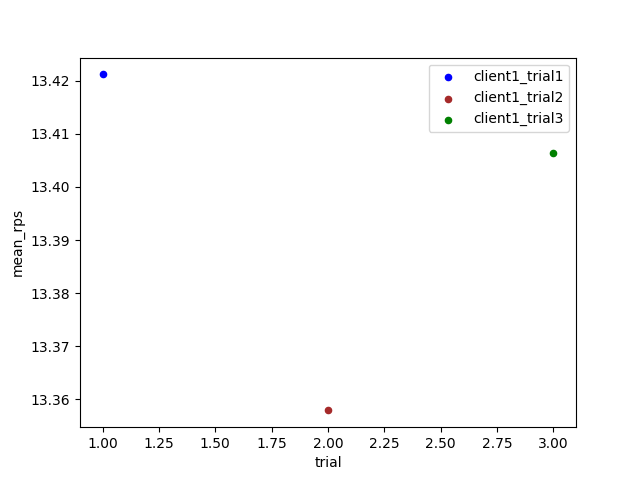

   trial   mean_rps
0      1  13.421191
1      2  13.357939
2      3  13.406388


,src_id,trial,mean_rps
0,5,1,13.421191
1,5,2,13.357939
2,5,3,13.406388


In [9]:
gdf = rtts_df.groupby(by=["src_id", "trial"]).agg(mean_rps=("average_rps", "mean")).reset_index()

ax = None
for t in gdf["trial"].unique():
    tdf = gdf[gdf["trial"] == t]
    for client_number, src_id in enumerate(tdf["src_id"].unique(), start=1):
        cdf = tdf[tdf["src_id"] == src_id]
        cdf["client_number"] = client_number
        ax = cdf.plot(kind="scatter", x="trial", y="mean_rps", ax=ax, label=f"client{client_number}_trial{t}", color=color_map[(t, client_number)])
        
print(gdf.groupby(by=["trial"]).mean().reset_index()[["trial", "mean_rps"]])
        
plt.show()

gdf

In [10]:
# Dataframe of attacker message RTT from attacker to receiver

attacker_messages_sql = f"""
WITH negate_attacker_timestamp AS (
SELECT
    e.trial,
	e.message_marker,
	e.observer_id,
	CASE WHEN e.observer_id={node_map_dnid['attacker']} THEN -1 * e.observe_timestamp
		 ELSE e.observe_timestamp
	END AS timestamp
FROM
	event e
	JOIN message m ON e.message_id = m.message_id
    JOIN node ndst ON ndst.node_id = m.dst_id
WHERE
	e.observer_id IN ({node_map_dnid['attacker']}, {node_map_dnid['receiver']})
)

SELECT 
	trial,
	message_marker,
	COUNT(timestamp) AS num_timestamps_should_be_2,
	MAX(timestamp) AS timestamp,
	SUM(timestamp) * 1e3 AS rtt_ms
FROM 
	negate_attacker_timestamp
GROUP BY
	trial,
	message_marker
"""

adf = pd.read_sql_query(attacker_messages_sql, con)
con.commit()
adf

adf["timestamp"] = abs(adf["timestamp"])
adf = adf[adf["rtt_ms"] > 0]
adf

,trial,message_marker,num_timestamps_should_be_2,timestamp,rtt_ms
0,1,366,2,1.638570e+09,118.613005
1,1,367,2,1.638570e+09,118.199825
2,1,368,2,1.638570e+09,117.750883
3,1,369,2,1.638570e+09,118.392944
4,1,370,2,1.638570e+09,118.252039
...,...,...,...,...,...
497831,3,166176,2,1.638570e+09,60040.697813
497832,3,166177,2,1.638570e+09,60040.524244
497833,3,166178,2,1.638570e+09,60040.457010
497834,3,166179,2,1.638570e+09,60040.349960


In [11]:
adf.describe()

,trial,message_marker,num_timestamps_should_be_2,timestamp,rtt_ms
count,476952.000000,476952.000000,476952.0,4.769520e+05,476952.000000
mean,2.004445,83899.918705,2.0,1.638570e+09,35528.497033
std,0.813651,47858.447572,0.0,3.337957e+02,19468.232701
min,1.000000,365.000000,2.0,1.638570e+09,66.890955
25%,1.000000,42714.750000,2.0,1.638570e+09,18416.767776
50%,2.000000,84232.500000,2.0,1.638570e+09,36684.033871
75%,3.000000,125401.000000,2.0,1.638570e+09,55049.624085
max,3.000000,168802.000000,2.0,1.638570e+09,75141.992092


/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


<IPython.core.display.Javascript object>


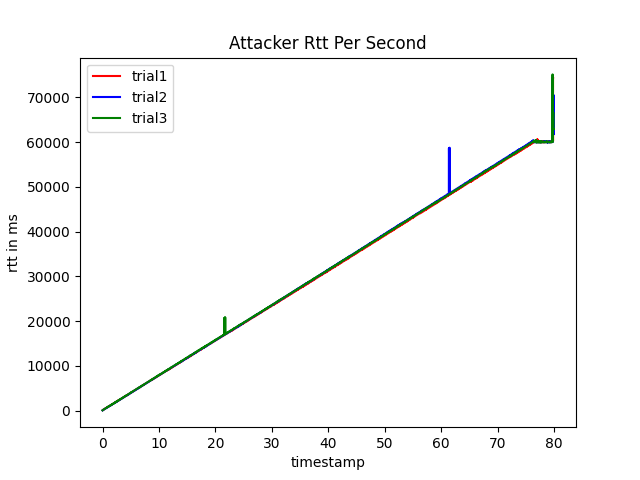

/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,trial,message_marker,num_timestamps_should_be_2,timestamp,rtt_ms
332025,3,366,2,0.009714,107.352972
332026,3,367,2,0.009432,106.913090
332027,3,368,2,0.009415,106.763840
332028,3,369,2,0.009727,106.955051
332029,3,370,2,0.010463,107.567072
...,...,...,...,...,...
497831,3,166176,2,79.686714,60040.697813
497832,3,166177,2,79.686657,60040.524244
497833,3,166178,2,79.686707,60040.457010
497834,3,166179,2,79.686718,60040.349960


In [16]:

trial_map_color = {1: "red", 2: "blue", 3:"green"}

ax = None
for t in adf["trial"].unique():
    trial_df = adf[adf["trial"] == t]
    min_timestamp = trial_df["timestamp"].min()
    trial_df["timestamp"] -= min_timestamp
    label = f"trial{t}"
    ax = trial_df.sort_values(by="timestamp").plot(kind="line", x="timestamp", y="rtt_ms", ax=ax, label=label, color=trial_map_color[t])
    
ax.set_ylabel("rtt in ms")
ax.set_title("Attacker Rtt Per Second")
plt.show()

trial_df

/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<IPython.core.display.Javascript object>


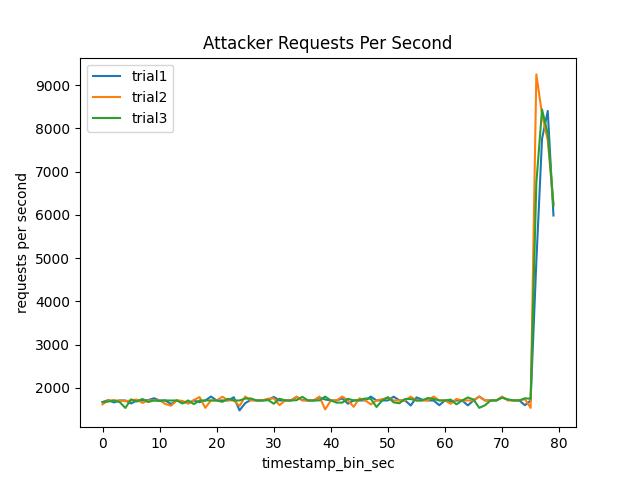

/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

,timestamp_bin_sec,packets_per_second
0,0.0,1673
1,1.0,1684
2,2.0,1710
3,3.0,1672
4,4.0,1537
...,...,...
75,75.0,1749
76,76.0,6732
77,77.0,8436
78,78.0,7878


In [13]:
ax = None
for t in adf["trial"].unique():
    trial_df = adf[adf["trial"] == t]
    min_timestamp = trial_df["timestamp"].min()
    trial_df["timestamp"] -= min_timestamp
    trial_df["timestamp_bin_sec"] = np.floor(trial_df["timestamp"])
    time_stats_df = trial_df.groupby(by=["timestamp_bin_sec"]).agg(\
                                         packets_per_second=("message_marker", "count")).reset_index()

    
    label = f"trial{t}"
    ax = time_stats_df.plot(kind="line", x="timestamp_bin_sec", y="packets_per_second", ax=ax, label=label)
    
ax.set_ylabel("requests per second")
ax.set_title("Attacker Requests Per Second")
plt.show()

time_stats_df